In [30]:
from crypto_chaotic import lorenz_attractor
import numpy as np
from math import sin, cos, sqrt

def chaos_commn(N = 3 , nosdata = 40000):
    xt = np.zeros(nosdata, dtype=np.float64)
    xr = np.zeros(nosdata, dtype=np.float64)
    signal = np.zeros(nosdata, dtype=np.float64)
    recovered = np.zeros(nosdata, dtype=np.float64)
    encryptedx = np.zeros(nosdata, dtype=np.float64)
        
    tstep = 0.001
    ndrop = 15000
    xold = np.random.uniform(0, 1, size=N)
    print xold
    
    for i in range(ndrop):
        lorenz_attractor.rkm_send(tstep, xold, N)
        
    for i in range(nosdata):
        lorenz_attractor.rkm_send(tstep, xold, N)
        xt[i] = xold[0]
        
    #signal = np.random.uniform(-1, 1, size=nosdata)
    for i in range(nosdata):
        signal[i] = 1.0 * sin(0.005 * i) 
        
    for i in range(nosdata):
        encryptedx[i] =  signal[i] + xt[i]
    
    
    xold = np.random.uniform(0, 1, size=N)
    print xold
    for i in range(ndrop):
        lorenz_attractor.rkm_send(tstep, xold, N)
        
    for i in range(nosdata):
        lorenz_attractor.rkm_receive(tstep, xold, encryptedx[i], N)
        xr[i] = xold[0]
        
    for i in range(nosdata):
        recovered[i] = encryptedx[i] - xr[i]
        
    return (signal, encryptedx, recovered, xt, xr)

In [31]:
signal, encryptedx, recovered, xt, xr = chaos_commn()
print signal
print encryptedx
print recovered

[ 0.95472974  0.78657719  0.61779572]
[ 0.71160941  0.37291699  0.06797103]
[ 0.          0.00499998  0.00999983 ..., -0.88050659 -0.87812543
 -0.87572231]
[-1.73049141 -1.70320961 -1.67613946 ..., -9.30109829 -9.30261341
 -9.30391057]
[ 7.17351972  7.18047214  7.18726844 ..., -1.3266547  -1.33349588
 -1.34035316]


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


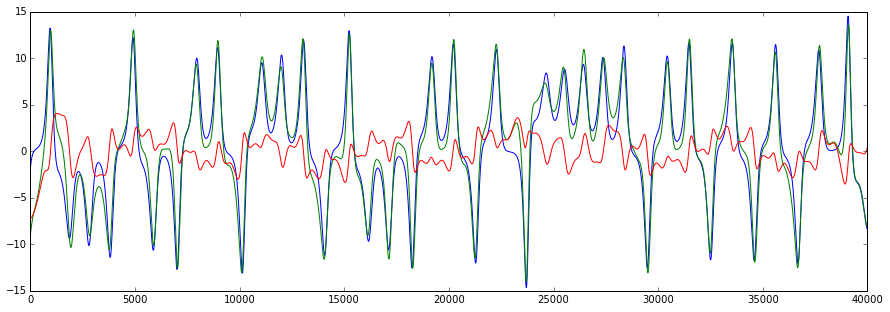

In [32]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
x = range(len(signal))
z = np.zeros(len(signal))

plt.figure(figsize=(15, 5))

#plt.plot(x,signal)
plt.plot(x,xt)
plt.plot(x,xr)
plt.plot(x,xr-xt)
#plt.plot(x,z)
#plt.plot(x,recovered)
#plt.plot(x,encryptedx)
plt.show()

Populating the interactive namespace from numpy and matplotlib
1250


`%matplotlib` prevents importing * from pylab and numpy


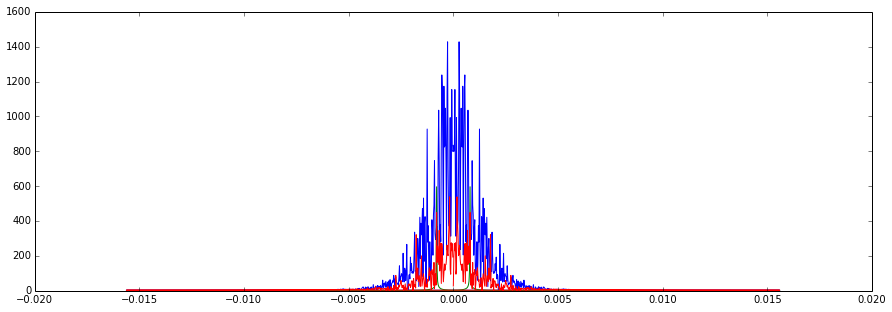

In [35]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import scipy
import scipy.fftpack


N = signal.size
t = range(0, N, 32) #scipy.linspace(0, N, N/128+1)

acc = lambda t: signal[t]
signal1 = acc(t)
print signal1.size
signal_FFT = abs(scipy.fft(signal1))
signal_freqs = scipy.fftpack.fftfreq(signal1.size, t[1]-t[0])

acc = lambda t: xt[t]
xt1 = acc(t)
xt_FFT = abs(scipy.fft(xt1))
xt_freqs = scipy.fftpack.fftfreq(xt1.size, t[1]-t[0])

acc = lambda t: xr[t] - xt[t]
err = acc(t)
err_FFT = abs(scipy.fft(err))
err_freqs = scipy.fftpack.fftfreq(err.size, t[1]-t[0])


plt.figure(figsize=(15, 5))

#plt.subplot(211)
#plt.plot(t, signal1)
#plt.plot(t, xt1)
#plt.plot(t, encryptedx1)
#plt.subplot(212)
plt.plot(xt_freqs,xt_FFT)
plt.plot(signal_freqs,signal_FFT)
plt.plot(err_freqs,err_FFT)
#plt.plot(x,xt)
#plt.plot(x,xr)
#plt.plot(x,recovered)
#plt.plot(x,encryptedx)
plt.show()

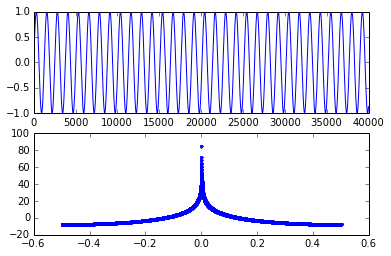

In [34]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi

#print signal
t = range(len(signal))
#print t

FFT = abs(scipy.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

pylab.subplot(211)
pylab.plot(t, signal)
pylab.subplot(212)
pylab.plot(freqs,20*scipy.log10(FFT),'.')
pylab.show()

In [9]:
print signal.size

40000


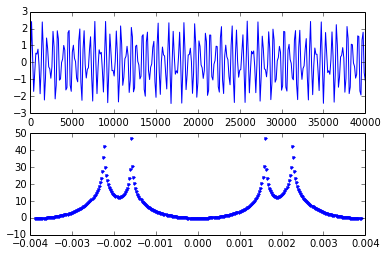

In [10]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi
N = 40000
t = scipy.linspace(0, N, N/128+1)
acc = lambda t: 10*scipy.sin(2*pi*2.0*t) + 5*scipy.sin(2*pi*8.0*t) + 2*scipy.random.random(len(t))

acc = lambda t: 1.5 * sin(0.01 * t) + 1.0 * sin(0.01 * sqrt(2.0) * t)

signal = acc(t)

FFT = abs(scipy.fft(signal))
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])

pylab.subplot(211)
pylab.plot(t, signal)
pylab.subplot(212)
pylab.plot(freqs,20*scipy.log10(FFT),'.')
pylab.show()

In [11]:
t = scipy.linspace(0, 10, 6)
print t

[  0.   2.   4.   6.   8.  10.]


In [12]:
print len(signal_FFT[10:])

1240


In [13]:
print range(0, 10, 1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
